In [169]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [170]:
# Importing the data / Leitura dos dados

url_trips_amount = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp-Project-Zuber-Company/refs/heads/main/moved_project_sql_result_01.csv'

df_trips_amount = pd.read_csv(url_trips_amount, sep = ',')

url_trips_average ='https://raw.githubusercontent.com/RafaelGenari/Bootcamp-Project-Zuber-Company/refs/heads/main/moved_project_sql_result_04.csv'

df_average_trips = pd.read_csv(url_trips_average, sep = ',')

url_trips_info = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp-Project-Zuber-Company/refs/heads/main/moved_project_sql_result_07.csv'

df_trips_info = pd.read_csv(url_trips_info, sep = ',')

## Checking data from dataframe trips_amount / Verificação dados Dataframe trips_amount

In [171]:
df_trips_amount.info() # Checking the data info / Verificando a informação dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [172]:
df_trips_amount.describe() # Checking the data description / Verificando a descrição dos dados

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [173]:
df_trips_amount.isnull().sum() # Checking the null values / Verificando os valores nulos

company_name    0
trips_amount    0
dtype: int64

In [174]:
df_trips_amount.duplicated().sum() # Checking the duplicated values / Verificando os valores duplicados

np.int64(0)

In [175]:
df_trips_amount.head(10) # Viewing the data / Visualizando os dados

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


## Checking data from dataframe average_trips / Verificação dados Dataframe average_trips

In [176]:
df_average_trips.info() # Checking the data info / Verificando a informação dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [177]:
df_average_trips.describe() # Checking the data description / Verificando a descrição dos dados

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [178]:
df_average_trips.isnull().sum() # Checking the null values / Verificando os valores nulos

dropoff_location_name    0
average_trips            0
dtype: int64

In [179]:
df_average_trips.duplicated().sum() # Checking the duplicated values / Verificando os valores duplicados

np.int64(0)

In [180]:
df_average_trips.head(10) # Viewing the data / Visualizando os dados

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Checking data from dataframe trips_info / Verificação dados Dataframe trips_info

In [181]:
df_trips_info.info() # Checking the data info / Verificando a informação dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [182]:
df_trips_info.describe() # Checking the data description / Verificando a descrição dos dados

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [183]:
df_trips_info.isnull().sum() # Checking the null values / Verificando os valores nulos

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [184]:
df_trips_info.duplicated().sum() # Checking the duplicated values / Verificando os valores duplicados

np.int64(197)

In [185]:
df_trips_info.head(10) # Viewing the data / Visualizando os dados

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [186]:
df_trips_info['start_ts'] = pd.to_datetime(df_trips_info['start_ts'])

In [187]:
df_trips_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Analyzing the data / Analisando os dados

In [188]:
top_10_neighborhoods = df_average_trips.sort_values(by='average_trips', ascending=False) # Sorting the top 10 neighborhoods / Ordenando os 10 bairros mais populares
top_10_neighborhoods = top_10_neighborhoods.nlargest(10, 'average_trips')
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


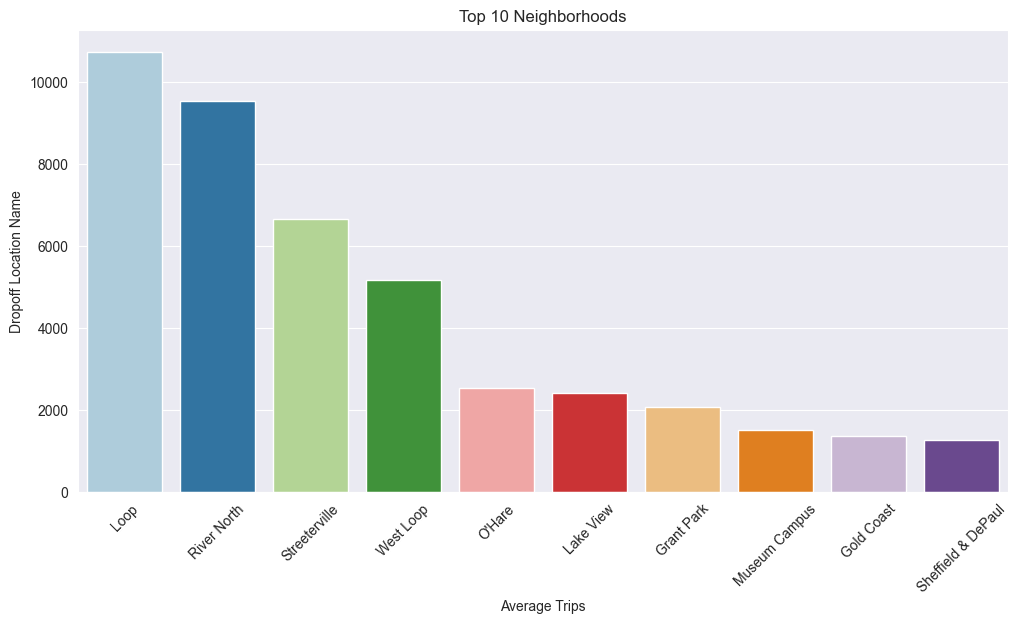

In [189]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'dropoff_location_name', y = 'average_trips', data = top_10_neighborhoods, palette = 'Paired', hue = 'dropoff_location_name')
plt.title('Top 10 Neighborhoods')
plt.xlabel('Average Trips')
plt.ylabel('Dropoff Location Name')
plt.xticks(rotation=45)
plt.show();

In [190]:
top_30_company = df_trips_amount.sort_values(by='trips_amount', ascending=False) # Sorting the top 30 companies / Ordenando os 30 empresas mais populares
top_30_company.head(30)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


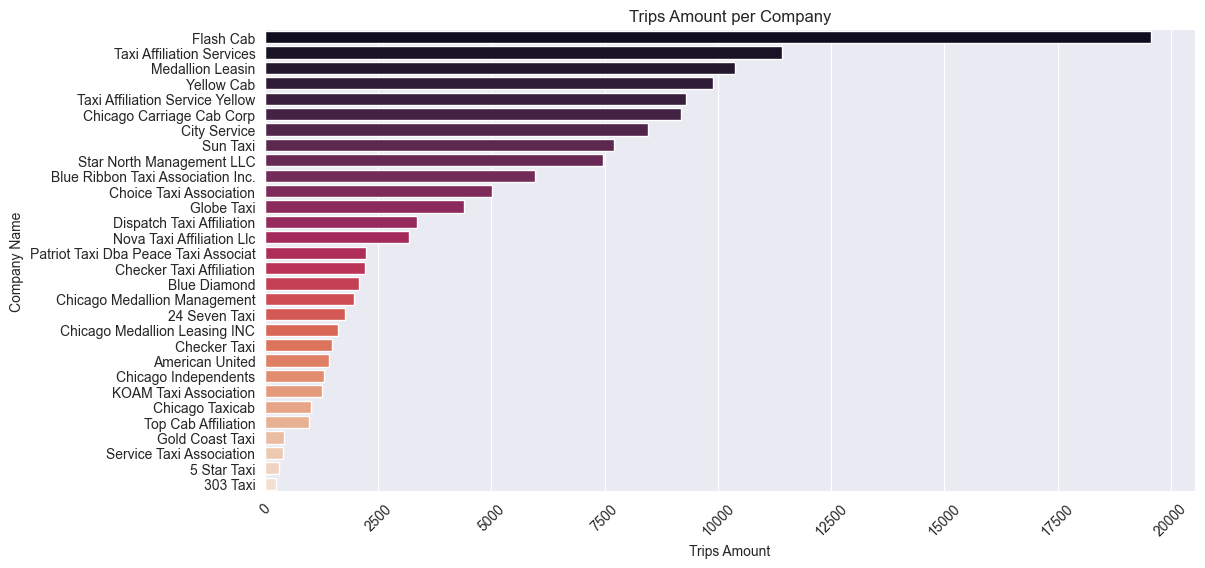

In [191]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'trips_amount', y = 'company_name', data = df_trips_amount.nlargest(30, 'trips_amount'), palette = 'rocket', hue = 'company_name')
plt.title('Trips Amount per Company')
plt.xlabel('Trips Amount')
plt.ylabel('Company Name')
plt.xticks(rotation=45)
plt.show();

We can see that within the top 10 most popular neighborhoods, the first two places: Loop and River North, respectively, have a difference of basically 1,200 between them, but for the third position the difference is almost 3,000. Furthermore, within the top 10, all neighborhoods have more than 1,200 trips on average.

When we look at the companies and the number of journeys, the first interesting thing to note is that of the 25 companies with the most journeys, there are a total of 24 with more than 1,000 journeys and only one that is below this figure, but very close, with 978 journeys. In addition, after going through the top 25 we see that the number of races for the companies drops by basically 50% compared to the top 25 companies, with the company with the most races outside this ranking indicated with only 428.

================================================================================================================

Podemos notar que dentro do top 10 bairros mais populares, os dois primeiros lugares: Loop e River North, respectivamente, tem entre eles uma diferença de basicamente 1.200, porém para a terceira posição a diferença é de quase 3.000. Além disso, dentro do top 10 todos os bairros tem mais do que 1.200 viagens em média.
m
Ao olharmos para as empresas e a quantidade de viagens, o primeiro ponto interessante que foi possível notar é que dentro das 25 empresas que tem mais corridas temos um total de 24 com mais do que 1.000 corridas e apenas uma que está abaixo deste valor, porém com valor bem próximo, tendo 978 corridas. Além disso, depois de passarmos o top 25 vemos que o número de corridas das empresas cai basicamente 50% se comparado com as 25 primeiras empresas, tendo a empresa com mais corridas fora deste ranking indicado com apenas 428.

## Hypotheses 

- Null hypothesis: the average duration of runs from the Loop to O'Hare International Airport are igual on rainy saturdays.

- Alternative hyphotesis: There's a difference in the average duration of runs from the Loop to O'Hare International Airport on rainy saturdays.


================================================================================================================

## Testando Hipóteses

- Hipótese nula: a duração média das corridas do Loop para o Aeroporto Internacional O'Hare são iguais nos sábados chuvosos.

- Hipótese alternativa: há uma diferença na duração média das corridas do Loop para o Aeroporto Internacional O'Hare nos sábados chuvosos.


In [192]:
df_trips_info['day_of_week'] = df_trips_info['start_ts'].dt.dayofweek # Creating a new column with the day of the week / Criando uma nova coluna com o dia da semana
df_trips_info

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [193]:
bad_saturdays = df_trips_info[df_trips_info['weather_conditions'] == 'Bad'] # Creating a new dataframe with the bad weather conditions / Criando um novo dataframe com as condições de clima ruim
rainy_saturdays = bad_saturdays[bad_saturdays['day_of_week'] == 5]['duration_seconds'] # Selecting saturday / Selecionando o sábado

good_saturdays = df_trips_info[df_trips_info['weather_conditions'] == 'Good'] # Creating a new dataframe with the good weather conditions / Criando um novo dataframe com as condições de clima bom
better_saturdays = good_saturdays[good_saturdays['day_of_week'] == 5]['duration_seconds'] # Selecting saturday / Selecionando o sábado

if (rainy_saturdays.var() == better_saturdays.var()):
    comparison_result = ttest_ind(rainy_saturdays, better_saturdays, equal_var = True) # running ttest to verify null or alternative hypothesis / rodagem ttest para verificação hipótese nula ou alternativa
else:
    comparison_result = ttest_ind(rainy_saturdays, better_saturdays, equal_var = False) # running ttest to verify null or alternative hypothesis / rodagem ttest para verificação hipótese nula ou alternativa

alpha = 0.05
comparison_result.pvalue < alpha

np.True_

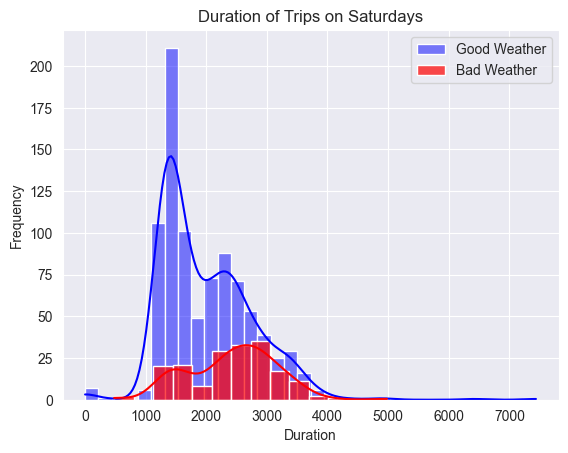

In [194]:
# Creating a histogram / Criando um histograma

sns.set_style('darkgrid')

sns.histplot(x = better_saturdays, color = 'blue', label = 'Good Weather', kde = True, alpha = 0.5)
sns.histplot(x = rainy_saturdays, color = 'red', label = 'Bad Weather', kde = True, alpha = 0.7)
plt.title('Duration of Trips on Saturdays')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend();

In [195]:
# making ttest more visual / deixando o ttest mais visual

print('p-value: ', comparison_result.pvalue)
if comparison_result.pvalue < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença na duração média das corridas do Loop para o Aeroporto Internacional O'Hare nos sábados chuvosos.")
else:
    print("Não rejeitamos a hipótese nula: não há uma diferença na duração média das corridas do Loop para o Aeroporto Internacional O'Hare nos sábados chuvosos.")

p-value:  6.738994326108734e-12
Rejeitamos a hipótese nula: há uma diferença na duração média das corridas do Loop para o Aeroporto Internacional O'Hare nos sábados chuvosos.


# Conclusion
### (How I formed the null and alternative hypotheses + What criteria I used to test the hypothesis and why + Conclusion)

After cleaning and collecting the data needed for analysis, we can see that of all the neighborhoods, the Loop and River North stand out with the highest number of trips, and that Flash Cab has the most runs of all the others.

For the tests to be carried out, what is being verified is whether or not there is an average difference between the runs that take place from Loop to O'Hare International Airport on rainy Saturdays. For this comparison, rainy Saturdays, which are marked as 'Bad' in the 'weather_conditions' column, have been separated from non-rainy days, marked as 'Good' in the same column.

The number of races on good days is higher than on rainy days, as we can see from the graph and the data, but the duration of races on rainy days is considerably longer. This difference could be because on rainy days there is a little more traffic than normal, but this is just speculation because to really understand the reason we would need more data and information to try to define a reason.

Therefore, with the data analyzed and the test carried out, we can come to the conclusion that, with the data available, the null hypothesis would be rejected because there is a difference in the average duration of runs on rainy Saturdays.

================================================================================================================

# Conclusão
### (Como formei as hipóteses nula e alternativa + Qual critério usei para testar a hipótese e porque + Conclusão)

Após limpeza e coleta dos dados que foram necessários para análise, podemos perceber que dentre todos os bairros o Loop e River North se destacam com maior número de viagens, além de que a empresa Flash Cab é a que tem mais corridas dentre todas as outras.

Para os testes a serem feitos, o que está a ser verificado é se existe ou não uma diferença média entre as corridas que acontecem de Loop para o Aeroporto Internacional O'Hare em sábados chuvosos. Para tal comparação foram separados os sábados chuvosos, que estão marcados como 'Bad' na coluna 'weather_conditions', dos dias não chuvosos, marcados como 'Good' nesta mesma coluna.

O número de corridas em dias bons é maior do que em dias chuvosos, como podemos ver no gráfico e nos dados, contudo, a duração das corridas em dias chuvosos é considerávelmente maior. Essa diferença pode ocorrer porque em dias chuvosos acaba-se por ter um pouco mais de trânsito que o normal, mas isso seria apenas uma especulação porque para entender mesmo o motivo seria preciso mais dados e informações para tentar definir um motivo.

Sendo assim, com os dados analisados e com o teste realizado podemos chegar a conclusão que, com os dados disponibilizados, seria rejeitada a hipótese nula devido existir uma diferença na duração média das corridas nos sábados chuvosos.